In [549]:
import pandas as pd

In [550]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [551]:
df_bp = df[['INCDATE','SEVERITYCODE']]
df_bp['INCDATE'] = pd.to_datetime(df_bp['INCDATE'])
df_bp['YEAR']=df_bp['INCDATE'].dt.year
df_bp['YEAR'] = df_bp['YEAR'].astype(str).replace('\.0', '', regex=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [552]:
df_bp.drop(['INCDATE'],axis=1,inplace=True)

# BUSINESS PROBLEM

As the plot shown below, the numbers of severe accidents are big for both severitycodes in every year (the numbers in 2020 are relatively small since the data haven't included the records for the whole year). Which means, these severe accidents are likely to influence our daily commuting and create troubles for us. From the plot we can also notice that the numbers of severe accidents with severitycode = 2 are significant - there are about 4000 cases every year (except for 2020 as explained previously). Which means, the severity of accaident we will meet is very uncertain. As we all know, the severity of an accident can largely impact the extent of the inconvenience for drivers. Therefore, predicting the severity of an accident based on all the known conditions would be very helpful for drivers to make a decision on their actions to the accident.

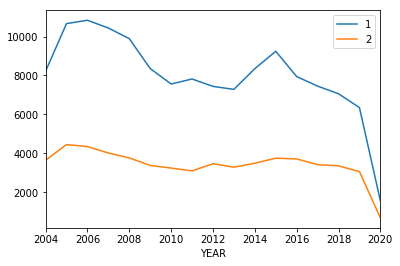

In [553]:
ctdf = df_bp.reset_index().groupby(['YEAR','SEVERITYCODE'], as_index=False).count().rename(columns={'index':'COUNT'})

from matplotlib import pyplot as plt
fig, ax = plt.subplots()

for key, data in ctdf.groupby('SEVERITYCODE'):
    data.plot(x='YEAR', y='COUNT', ax=ax, label=key)

# DATA CLEANING AND DATA TRANSFORMATION

In [554]:
df.describe(include='all')

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


## 1) Removing Variables with a Large Number of Missing Value

As shown above, there are 19 vairables (out of 38) with missing values. There are 7 vairables have a large number of missing values (at least 40%) out of the total 194673 records. These variables are: INTKEY, EXCEPTRSNCODE, EXCEPTRSNDESC, INATTENTIONIND, PEDROWNOTGRNT, SDOTCOLNUM, and SPEEDING. Since variable with a large number of missing values can't provide us enough information, these variables will be removed from the data for the further use. As a result, all the remaining variables have missing values less than 3.5%.

In [555]:
df.isnull().sum() 

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [556]:
df.shape

(194673, 38)

In [557]:
df1 = df
df1.drop(['INTKEY', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'INATTENTIONIND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING'],axis=1,inplace=True)

## 2) Removing Variables with Same Values but in Different Format

After reviewing the datasets, there are 5 pairs of variables with the same values but in different format: SEVERITYCODE & SEVERITYDESC, INCDATE & INCDTTM, SDOT_COLCODE & SDOT_COLDESC, and ST_COLCODE & ST_COLDESC. Hence, only one variable of each pair is kept in the dataset. Besides, SEVERITYCODE has exsited for twice in this dataset, so one of them wille be removed.

In [558]:
df1.drop(['SEVERITYDESC','INCDTTM', 'SDOT_COLDESC', 'ST_COLDESC','SEVERITYCODE.1'],axis=1, inplace = True)

## 3) Excluding Uncessary Variables

Due to scalability, there are 3 variables are excluded: X, Y, LOCATION, SDOT_COLCODE and ST_COLCODE.

In [559]:
df1.drop(['X', 'Y','LOCATION', 'SDOT_COLCODE', 'ST_COLCODE'],axis=1,inplace=True)

In [560]:
df1.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'SEGLANEKEY', 'CROSSWALKKEY'],axis=1, inplace = True)

Besides, there are 6 vairables that contain meaningless values are excluded: OBJECTID, INCKEY, COLDETKEY, REPORTNO, SEGLANEKEY, and  CROSSWALKKEY.

In [561]:
df1.shape

(194673, 15)

## 4) Changing Values to the Same Format

As shown below, the values of UNDERINFL used two formats: 1/0 and Y/N. These values will be changed to use the same format - 1 for Y and 0 for N. 

In [562]:
df1.groupby('UNDERINFL').size()

UNDERINFL
0     80394
1      3995
N    100274
Y      5126
dtype: int64

In [563]:
df1['UNDERINFL'] = np.where(df1['UNDERINFL'] =='Y',1,df1['UNDERINFL'])
df1['UNDERINFL'] = np.where(df1['UNDERINFL'] =='N',0,df1['UNDERINFL'])
df1.head()

,SEVERITYCODE,STATUS,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,Matched,Intersection,Angles,2,0,0,2,2013/03/27 00:00:00+00,At Intersection (intersection related),0,Overcast,Wet,Daylight,N
1,1,Matched,Block,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,N
2,1,Matched,Block,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,N
3,1,Matched,Block,Other,3,0,0,3,2013/03/29 00:00:00+00,Mid-Block (not related to intersection),0,Clear,Dry,Daylight,N
4,2,Matched,Intersection,Angles,2,0,0,2,2004/01/28 00:00:00+00,At Intersection (intersection related),0,Raining,Wet,Daylight,N


## 5) Data Transformation

### a. Normalizing Numeric Data

As we can notice below, the range of 'PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT' are very different. The largest range is 81, while the smallest range is 2. Which means, to treat the numbers fairly, we need to normalize the data.

In [564]:
df1[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']].describe()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
count,194673.000000,194673.000000,194673.000000,194673.000000
mean,2.444427,0.037139,0.028391,1.920780
std,1.345929,0.198150,0.167413,0.631047
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,2.000000
50%,2.000000,0.000000,0.000000,2.000000
75%,3.000000,0.000000,0.000000,2.000000
max,81.000000,6.000000,2.000000,12.000000


In [565]:
from sklearn import preprocessing
df1[['PERSONCOUNT']] = preprocessing.normalize(df1[['PERSONCOUNT']])
df1[['PEDCOUNT']]= preprocessing.normalize(df1[['PEDCOUNT']])
df1[['PEDCYLCOUNT']] = preprocessing.normalize(df1[['PEDCYLCOUNT']])
df1[['VEHCOUNT']]= preprocessing.normalize(df1[['VEHCOUNT']])

### b. Transforming Binary Variable to 1/0: SEVERITYCODE, STATUS, and HITPARKEDCAR

In [566]:
df1['SEVERITYCODE'] = np.where(df1.SEVERITYCODE ==2,1,0)
df1['STATUS'] = np.where(df1.STATUS =='Matched',1,0)
df1['HITPARKEDCAR'] = np.where(df1.HITPARKEDCAR =='Y',1,0)

### c. Transforming Date to Month and Weekdays

In [567]:
df1['INCDATE'] = pd.to_datetime(df1['INCDATE'])
df1['MONTH'] = df1['INCDATE'].dt.month
df1['MONTH'] = df1['MONTH'].astype(str).replace('\.0', '', regex=True)


df1['WEEKDAY'] = df1['INCDATE'].dt.weekday

In [568]:
df1.drop('INCDATE',axis=1,inplace=True)
df1.head()

,SEVERITYCODE,STATUS,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,MONTH,WEEKDAY
0,1,1,Intersection,Angles,1.0,0.0,0.0,1.0,At Intersection (intersection related),0,Overcast,Wet,Daylight,0,3,2
1,0,1,Block,Sideswipe,1.0,0.0,0.0,1.0,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,0,12,2
2,0,1,Block,Parked Car,1.0,0.0,0.0,1.0,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,0,11,3
3,0,1,Block,Other,1.0,0.0,0.0,1.0,Mid-Block (not related to intersection),0,Clear,Dry,Daylight,0,3,4
4,1,1,Intersection,Angles,1.0,0.0,0.0,1.0,At Intersection (intersection related),0,Raining,Wet,Daylight,0,1,2


### d.  Transforming Categorical Variables to Dummy Variables: ADDRTYPE, COLLISIONTYPE, JUNCTIONTYPE, WEATHER, ROADCOND, LIGHTCOND, MONTH, and WEEKDAY

In [569]:
df_trans = df1
df_trans = pd.get_dummies(df_trans, columns=['ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND','MONTH','WEEKDAY'])

In [570]:
df_trans.head()

,SEVERITYCODE,STATUS,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,HITPARKEDCAR,ADDRTYPE_Alley,ADDRTYPE_Block,...,MONTH_7,MONTH_8,MONTH_9,WEEKDAY_0,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,WEEKDAY_5,WEEKDAY_6
0,1,1,1.0,0.0,0.0,1.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,1.0,0.0,0.0,1.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,1,1.0,0.0,0.0,1.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,1,1.0,0.0,0.0,1.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,1,1.0,0.0,0.0,1.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## 6) Removing Missing Values

As shown below, there are 182895 records remaining.

In [629]:
df1 = df1.dropna()
df_trans = df_trans.dropna()

# DATA ANALYSIS

## 1) Correlation

As we can see from the correlation heat map below, the correlation of the numeric variables are close to 0, which means there is almost no correlation between these variables. Hence, we don't need to worry about the collinearity problem.

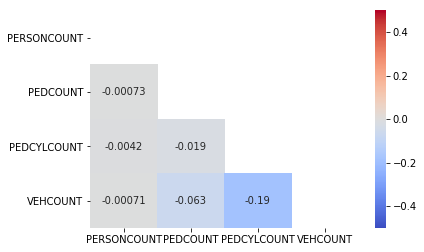

In [573]:
import seaborn as sns
df_cor = df1[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']]
matrix = np.triu(df_cor.corr())
sns.heatmap(df_cor.corr(),annot=True,cmap= 'coolwarm', vmin=-0.5, vmax=0.5, center= 0,mask=matrix)

## 2) Barcharts and ANOVA Tests

### a. ADDRTYPE

As shown in the barchart and the result of the ANOVA tests, we can find that, in terms of severity, the impact of different collision address types has a significant difference.

F_onewayResult(statistic=3530.8078377494403, pvalue=0.0)

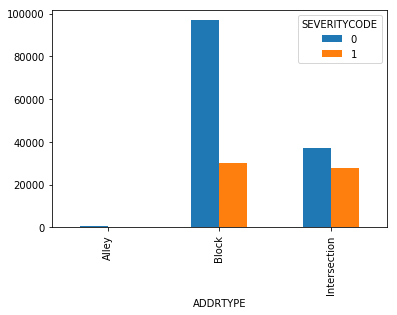

In [600]:
ax = df.groupby(['SEVERITYCODE','ADDRTYPE'])['ADDRTYPE'].count().unstack(0).plot.bar()

from scipy import stats
df_anova = df1[['ADDRTYPE','SEVERITYCODE']]
grp_anova = df_anova.groupby('ADDRTYPE')
anova_result = stats.f_oneway(grp_anova.get_group("Intersection")["SEVERITYCODE"],
                              grp_anova.get_group("Block")["SEVERITYCODE"],
                              grp_anova.get_group("Alley")["SEVERITYCODE"])
anova_result

### b. COLLISIONTYPE

As shown in the barchart and the result of the ANOVA tests, we can find that, in terms of severity, the impact of different collision types has a significant difference.

F_onewayResult(statistic=5369.001306448202, pvalue=0.0)

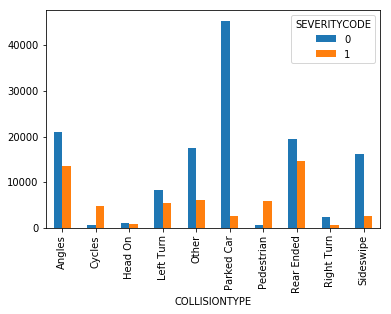

In [605]:
ax = df.groupby(['SEVERITYCODE','COLLISIONTYPE'])['COLLISIONTYPE'].count().unstack(0).plot.bar()

from scipy import stats
df_anova = df1[['COLLISIONTYPE','SEVERITYCODE']]
grp_anova = df_anova.groupby('COLLISIONTYPE')
anova_result = stats.f_oneway(grp_anova.get_group("Angles")["SEVERITYCODE"],
                              grp_anova.get_group("Cycles")["SEVERITYCODE"],
                              grp_anova.get_group("Head On")["SEVERITYCODE"],
                              grp_anova.get_group("Left Turn")["SEVERITYCODE"],
                              grp_anova.get_group("Other")["SEVERITYCODE"],
                              grp_anova.get_group("Parked Car")["SEVERITYCODE"],
                              grp_anova.get_group("Pedestrian")["SEVERITYCODE"],
                              grp_anova.get_group("Rear Ended")["SEVERITYCODE"],
                              grp_anova.get_group("Right Turn")["SEVERITYCODE"],
                              grp_anova.get_group("Sideswipe")["SEVERITYCODE"])
anova_result

### c. JUNCTIONTYPE

As shown in the barchart and the result of the ANOVA tests, we can find that, in terms of severity, the impact of different categories of junction at which the collision took place has a significant difference.

F_onewayResult(statistic=1403.6655189455819, pvalue=0.0)

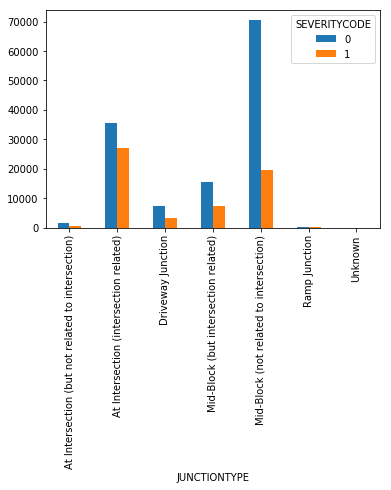

In [609]:
ax = df.groupby(['SEVERITYCODE','JUNCTIONTYPE'])['JUNCTIONTYPE'].count().unstack(0).plot.bar()

df_anova = df1[['JUNCTIONTYPE','SEVERITYCODE']]
grp_anova = df_anova.groupby('JUNCTIONTYPE')
anova_result = stats.f_oneway(grp_anova.get_group("At Intersection (but not related to intersection)")["SEVERITYCODE"],
                              grp_anova.get_group("At Intersection (intersection related)")["SEVERITYCODE"],
                              grp_anova.get_group("Driveway Junction")["SEVERITYCODE"],
                              grp_anova.get_group("Mid-Block (but intersection related)")["SEVERITYCODE"],
                              grp_anova.get_group("Mid-Block (not related to intersection)")["SEVERITYCODE"],
                              grp_anova.get_group("Ramp Junction")["SEVERITYCODE"],
                              grp_anova.get_group("Unknown")["SEVERITYCODE"])
anova_result

### d. WEATHER

As shown in the barchart and the result of the ANOVA tests, we can find that, in terms of severity, the impact of different weather types has a significant difference.

F_onewayResult(statistic=374.0303665512938, pvalue=0.0)

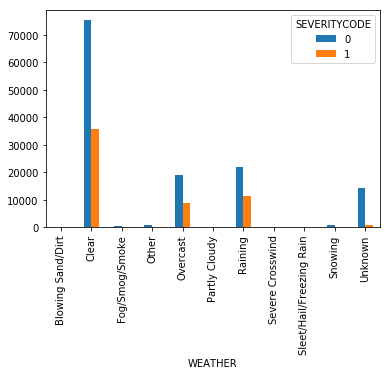

In [616]:
ax = df.groupby(['SEVERITYCODE','WEATHER'])['WEATHER'].count().unstack(0).plot.bar()

from scipy import stats
df_anova = df1[['WEATHER','SEVERITYCODE']]
grp_anova = df_anova.groupby('WEATHER')
anova_result = stats.f_oneway(grp_anova.get_group("Blowing Sand/Dirt")["SEVERITYCODE"],
                              grp_anova.get_group("Clear")["SEVERITYCODE"],
                              grp_anova.get_group("Fog/Smog/Smoke")["SEVERITYCODE"],
                              grp_anova.get_group("Other")["SEVERITYCODE"],
                              grp_anova.get_group("Overcast")["SEVERITYCODE"],
                              grp_anova.get_group("Partly Cloudy")["SEVERITYCODE"],
                              grp_anova.get_group("Raining")["SEVERITYCODE"],
                              grp_anova.get_group("Severe Crosswind")["SEVERITYCODE"],
                              grp_anova.get_group("Sleet/Hail/Freezing Rain")["SEVERITYCODE"],
                              grp_anova.get_group("Snowing")["SEVERITYCODE"],
                              grp_anova.get_group("Unknown")["SEVERITYCODE"])
anova_result

### e.  ROADCOND

As shown in the barchart and the result of the ANOVA tests, we can find that, in terms of severity, the impact of different conditions of the road during the collision has a significant difference.

F_onewayResult(statistic=476.040939664256, pvalue=0.0)

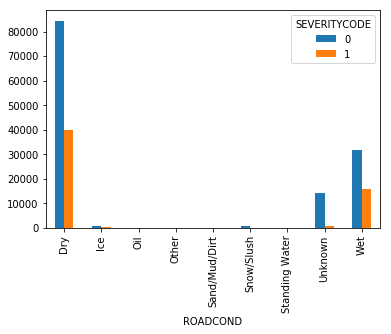

In [621]:
ax = df.groupby(['SEVERITYCODE','ROADCOND'])['ROADCOND'].count().unstack(0).plot.bar()

from scipy import stats
df_anova = df1[['ROADCOND','SEVERITYCODE']]
grp_anova = df_anova.groupby('ROADCOND')
anova_result = stats.f_oneway(grp_anova.get_group("Dry")["SEVERITYCODE"],
                              grp_anova.get_group("Ice")["SEVERITYCODE"],
                              grp_anova.get_group("Oil")["SEVERITYCODE"],
                              grp_anova.get_group("Other")["SEVERITYCODE"],
                              grp_anova.get_group("Sand/Mud/Dirt")["SEVERITYCODE"],
                              grp_anova.get_group("Snow/Slush")["SEVERITYCODE"],
                              grp_anova.get_group("Standing Water")["SEVERITYCODE"],
                              grp_anova.get_group("Unknown")["SEVERITYCODE"],
                              grp_anova.get_group("Wet")["SEVERITYCODE"])
anova_result

### f. LIGHTCOND

As shown in the barchart and the result of the ANOVA tests, we can find that, in terms of severity, the impact of different conditions of the light during the collison has a significant difference.

F_onewayResult(statistic=463.6530730759219, pvalue=0.0)

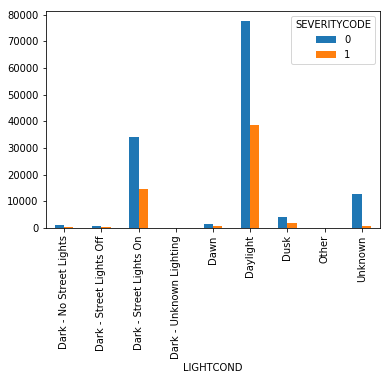

In [623]:
ax = df.groupby(['SEVERITYCODE','LIGHTCOND'])['LIGHTCOND'].count().unstack(0).plot.bar()

from scipy import stats
df_anova = df1[['LIGHTCOND','SEVERITYCODE']]
grp_anova = df_anova.groupby('LIGHTCOND')
anova_result = stats.f_oneway(grp_anova.get_group("Dark - No Street Lights")["SEVERITYCODE"],
                              grp_anova.get_group("Dark - Street Lights Off")["SEVERITYCODE"],
                              grp_anova.get_group("Dark - Street Lights On")["SEVERITYCODE"],
                              grp_anova.get_group("Dark - Unknown Lighting")["SEVERITYCODE"],
                              grp_anova.get_group("Dawn")["SEVERITYCODE"],
                              grp_anova.get_group("Daylight")["SEVERITYCODE"],
                              grp_anova.get_group("Dusk")["SEVERITYCODE"],
                              grp_anova.get_group("Other")["SEVERITYCODE"],
                              grp_anova.get_group("Unknown")["SEVERITYCODE"])
anova_result

### g. MONTH

As shown in the barchart and the result of the ANOVA tests, we can find that, in terms of severity, the impact of different months has a significant difference.

F_onewayResult(statistic=11.352726304964133, pvalue=1.919917690358976e-21)

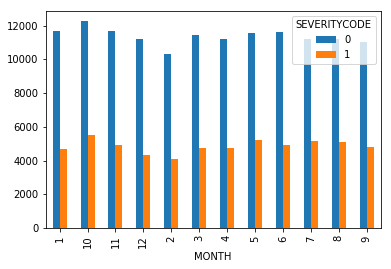

In [625]:
ax = df.groupby(['SEVERITYCODE','MONTH'])['MONTH'].count().unstack(0).plot.bar()

from scipy import stats
df_anova = df1[['MONTH','SEVERITYCODE']]
grp_anova = df_anova.groupby('MONTH')
anova_result = stats.f_oneway(grp_anova.get_group("1")["SEVERITYCODE"],
                              grp_anova.get_group("2")["SEVERITYCODE"],
                              grp_anova.get_group("3")["SEVERITYCODE"],
                              grp_anova.get_group("4")["SEVERITYCODE"],
                              grp_anova.get_group("5")["SEVERITYCODE"],
                              grp_anova.get_group("6")["SEVERITYCODE"],
                              grp_anova.get_group("7")["SEVERITYCODE"],
                              grp_anova.get_group("8")["SEVERITYCODE"],
                              grp_anova.get_group("9")["SEVERITYCODE"],
                              grp_anova.get_group("10")["SEVERITYCODE"],
                              grp_anova.get_group("11")["SEVERITYCODE"],
                              grp_anova.get_group("12")["SEVERITYCODE"])
anova_result

### h. WEEKDAY

As shown in the barchart and the result of the ANOVA tests, we can find that, in terms of severity, the impact of different weekdays has a significant difference.

In [631]:
df1.groupby('WEEKDAY').size()

WEEKDAY
0    24574
1    26767
2    26965
3    27517
4    30341
5    25965
6    20766
dtype: int64

F_onewayResult(statistic=15.001097235389008, pvalue=3.051168465146761e-17)

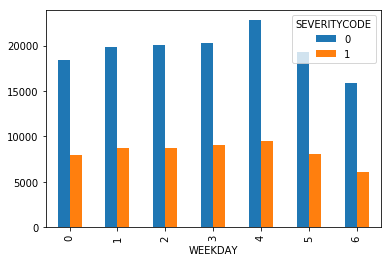

In [635]:
ax = df.groupby(['SEVERITYCODE','WEEKDAY'])['WEEKDAY'].count().unstack(0).plot.bar()

from scipy import stats
df_anova = df1[['WEEKDAY','SEVERITYCODE']]
grp_anova = df_anova.groupby('WEEKDAY')
anova_result = stats.f_oneway(grp_anova.get_group(0)["SEVERITYCODE"],
                              grp_anova.get_group(1)["SEVERITYCODE"],
                              grp_anova.get_group(2)["SEVERITYCODE"],
                              grp_anova.get_group(3)["SEVERITYCODE"],
                              grp_anova.get_group(4)["SEVERITYCODE"],
                              grp_anova.get_group(5)["SEVERITYCODE"],
                              grp_anova.get_group(6)["SEVERITYCODE"])
anova_result